In [1]:
from math import sqrt
from datetime import datetime
from numpy import concatenate
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Datayı Yükleyelim
path = r'c:\sxk990.xlsx'
data = pd.read_excel(path, date_format=[0])
# İlk 5 Satır
data.head()

,DATE_TIME,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2022-01-01 00:00:00,133,1,60,149
1,2022-01-01 01:00:00,133,8,63,130
2,2022-01-01 02:00:00,139,7,69,101
3,2022-01-01 03:00:00,145,3,61,90
4,2022-01-01 04:00:00,148,6,73,55


In [3]:
#Datetime Haline Getirilmesi
data['DATE_TIME'] = pd.to_datetime(data.DATE_TIME, format='%Y-%m-%d %H:%M')
#İndex'e Alınması
data.index = data.DATE_TIME

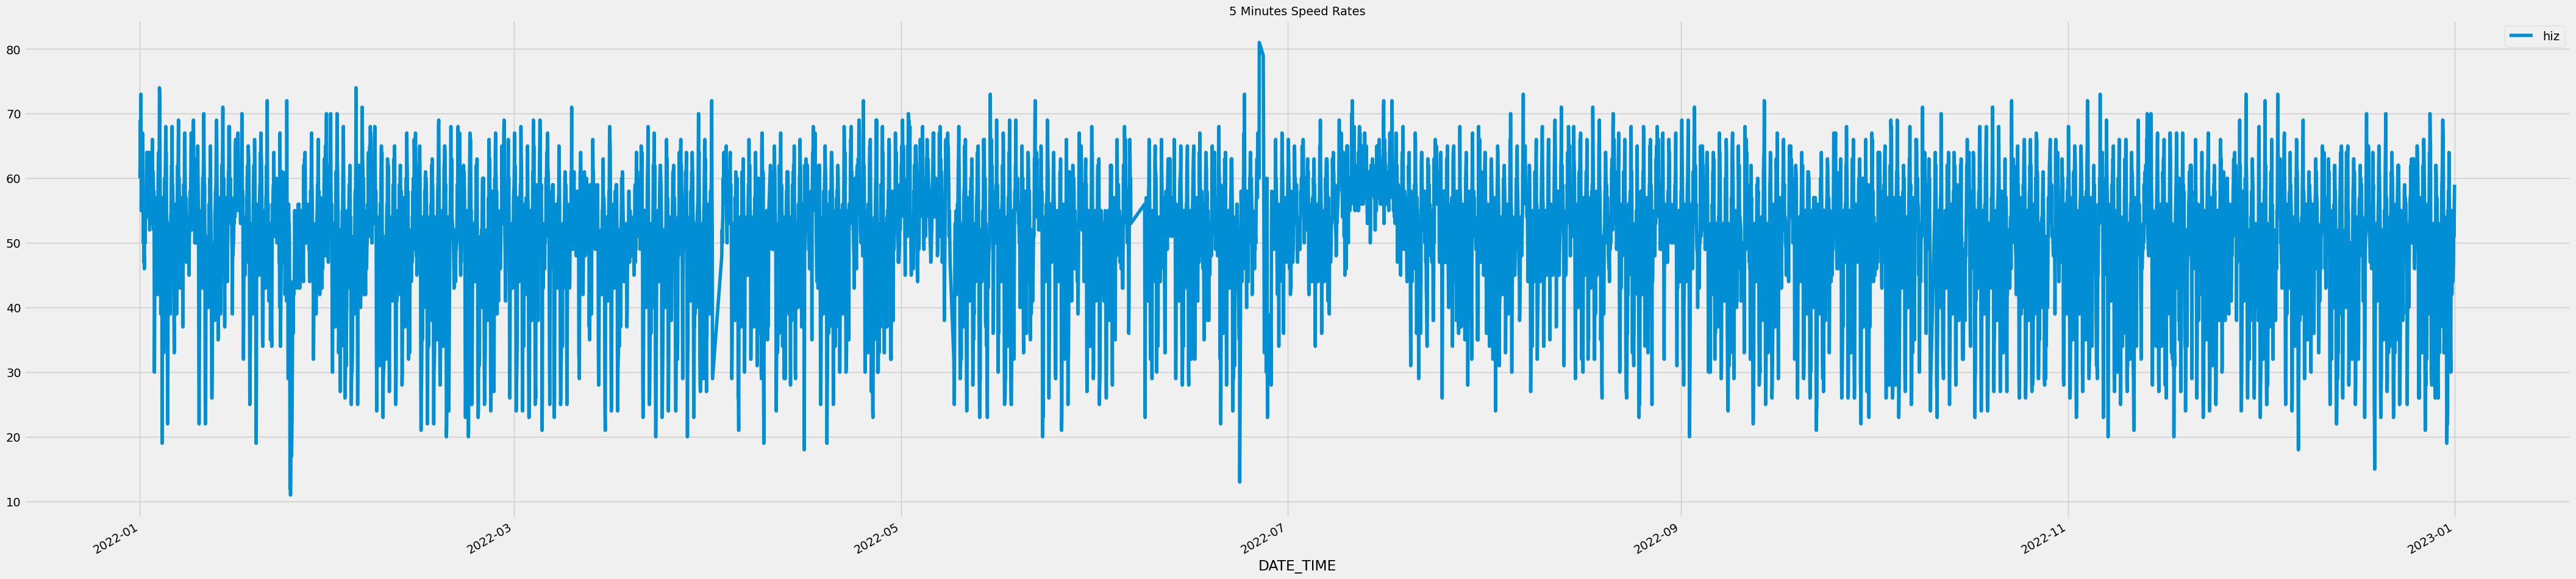

In [4]:
fig = plt.figure(figsize=(48,12))
data.AVERAGE_SPEED.plot(label='hiz')
plt.legend(loc='best')
plt.title('5 Minutes Speed Rates', fontsize=14)
plt.show()

In [5]:
values = data['AVERAGE_SPEED'].values.reshape(-1,1)
values = values.astype('float32')

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(values)

In [7]:
# %60 Train % 40 Test
TRAIN_SIZE = 0.60
train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Veri Örneği Sayıları (training set, test set): " + str((len(train), len(test))))

Veri Örneği Sayıları (training set, test set): (5121, 3414)


In [8]:
def create_dataset(dataset, window_size):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[(i + window_size), 0])
    return(np.array(data_X), np.array(data_Y))

In [9]:
# Verisetlerimizi Oluşturalım
window_size = 6
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)
#train_X[:4]
#test_Y[10:15]

Original training data shape:
(5114, 6)


In [10]:
def sigmoid_act(x, der=False):
   import numpy as np

   if (der == True):  # Turev sigmoid
      f = 1 / (1 + np.exp(- 0.25*x)) * (1 - 1 / (1 + np.exp(- 0.25*x)))
   else:  # sigmoid
      f = 1 / (1 + np.exp(- 0.25*x))

   return f


def tanh_act(x, der=False):
   import numpy as np

   if (der == True):  # Turev tanh
      f = 1 - np.square(((np.exp(x)) - (np.exp(-x))) / ((np.exp(x)) + (np.exp(-x))))
   else:
      f = ((np.exp(x)) - (np.exp(-x))) / ((np.exp(x)) + (np.exp(-x)))

   return f

def Lineer_act(x, der=False):
   import numpy as np

   if (der == True):  # the derivative of the ReLU is the Heaviside Theta
      f = 1
   else:
      f = x

   return f




In [11]:

p = 30  # 1.Gizli Katman neron sayisi
q = 20  # 2.Gizli Katman neron sayisi
r = 20  # 3.Gizli Katman neron sayisi
t = 30  # 4.Gizli Katman neron sayisi
#s = np.size(Y, 1)   # Cikis Katmani neron sayisi
s = 1

# Learning rate & Momentum

eta = 1/300            # Learning rate
alpha = 1 / 900      # Momentum

w10 = np.zeros((p, np.size(train_X, 1)))              # (k-1) 1. Katman Agirlik Degerleri - momentum icin.
w11 = 0.25 * np.random.randn(p, np.size(train_X, 1))   # 1. Katman
b1 = 0.25 * np.random.randn(p)

w20 = np.zeros((q, p))                          # (k-1) 2. Katman Agirlik Degerleri - momentum icin.
w21 = 0.25 * np.random.rand(q, p)                # 2. Katman
b2 = 0.25 * np.random.rand(q)

w30 = np.zeros((r, q))                          # (k-1) 3. Katman Agirlik Degerleri - momentum icin.
w31 = 0.25 * np.random.rand(r, q)                # 3. Katman
b3 = 0.25 * np.random.rand(r)

w40 = np.zeros((t, r))                          # (k-1) 4. Katman Agirlik Degerleri - momentum icin.
w41 = 0.25 * np.random.rand(t, r)                # 4. Katman
b4 = 0.25 * np.random.rand(t)

wOut0 = np.zeros((s, t))                        # (k-1) Cikis Katmani Agirlik Degerleri - momentum icin.
wOut1 = 0.25 * np.random.rand(s, t)              # Cikis Katmani
bOut = 0.25 * np.random.rand(s)

act = tanh_act

E_ani_max = []
E_ort = []
epoch = 1000                             # Iterasyon Sayisi


l= 999


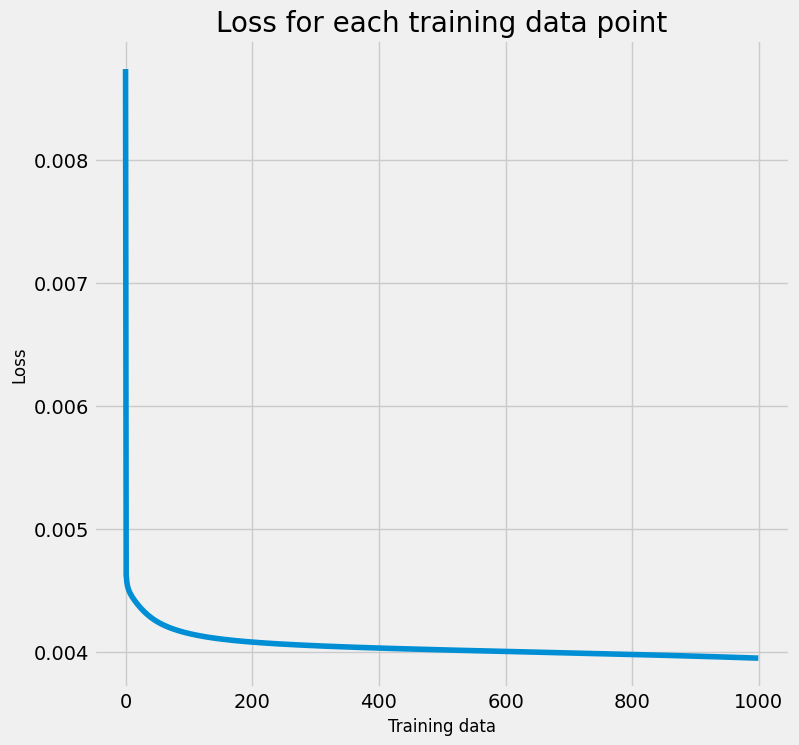

In [12]:
for l in range(epoch):
  E_ani = []
  
  for k in range(np.size(train_X, 0)):

    # 1: Egitim Veri Seti Girisi
    x = train_X[k]
    #print("x= ",x)
    # 2: Feed forward
    w1 = w11
    v1 = np.dot(w1, x) + b1
    yl1 = act(v1)  # 1. Katman Cikisi   y1: Gercek cikis olduğundan farklı olsun diye yl1 yazildi.
    w2 = w21
    v2 = np.dot(w2, yl1) + b2
    yl2 = act(v2)  # 2. Katman Cikisi   y2: Gercek cikis olduğundan farklı olsun diye yl2 yazildi.
    w3 = w31
    v3 = np.dot(w3, yl2) + b3
    yl3 = act(v3)  # 3. Katman Cikisi
    w4 = w41
    v4 = np.dot(w4, yl3) + b4
    yl4 = act(v4)  # 4. Katman Cikisi
    wOut = wOut1
    v_o = np.dot(wOut, yl4) + bOut
    y = Lineer_act(v_o)  # Cikis Katmani Cikisi


    # 2.2: Cikis Katmani Yerel Gradyen
    delta_Out = (train_Y[k] - y) * Lineer_act(v_o, der=True)
    #print("delta_Out= ",delta_Out)


    # 2.3: Backpropagate
    delta_4 = np.dot(delta_Out, wOut) * act(v4, der=True)   # 4. Katman Yerel Gradyen
    delta_3 = np.dot(delta_4, w4) * act(v3, der=True)       # 3. Katman Yerel Gradyen
    delta_2 = np.dot(delta_3, w3) * act(v2, der=True)       # 2. Katman Yerel Gradyen
    delta_1 = np.dot(delta_2, w2) * act(v1, der=True)       # 1. Katman Yerel Gradyen

    # 3: Gradient descent
    
    wOut = wOut1 + eta * np.outer(delta_Out, yl4) + alpha * (wOut1 - wOut0)  # Cikis Katmani Agirlik güncelleme
    wOut0 = wOut1
    wOut1 = wOut
    bOut = bOut + eta * delta_Out
    
    
    w4 = w41 + eta * np.outer(delta_4, yl3) + alpha * (w41 - w40)  # Gizli Katman 4 Agirlik güncelleme
    w40 = w41
    w41 = w4
    b4 = b4 + eta * delta_4
    
    
    w3 = w31 + eta * np.outer(delta_3, yl2) + alpha * (w31 - w30)  # Gizli Katman 3 Agirlik güncelleme
    w30 = w31
    w31 = w3
    b3 = b3 + eta * delta_3


    w2 = w21 + eta * np.outer(delta_2, yl1) + alpha * (w21 - w20)  # Gizli Katman 2 Agirlik güncelleme
    w20 = w21
    w21 = w2
    b2 = b2 + eta * delta_2

    
    w1 = w11 + eta * np.outer(delta_1, x) + alpha * (w11 - w10)  # Gizli Katman 1 Agirlik güncelleme
    w10 = w11
    w11 = w1
    b1 = b1 + eta * delta_1
    
    e = train_Y[k] - y

    # 4. loss function Hesaplama
    
    E_ani.append((1 / 2) * np.dot(e.T, e) )
    
  E_ort.append((1 / np.size(train_X, 0)) * sum(E_ani))
  E_ani_max.append(max(E_ani))
    
  if l >= 21:
      if abs((E_ort[l - 1]) - (E_ort[l])) <= 0.0000000001 or (E_ort[l - 20]) - (E_ort[l]) <  -0.0005:
         print("E_ort_degisim=",(E_ort[l - 20]) - (E_ort[l]))
         break

print("l=",l)


# 5. Her Iterasyon icin hatayi cizdiriyoruz

plt.figure(figsize=(8, 8))
#plt.scatter(np.arange(0, l+1 ), E_ort, alpha=0.5, s=10, label='Error')
plt.plot(E_ort)
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.show()


In [13]:
pred_train_Y = [] 
E_ort_tr = []
E_ani_tr = []

# 7. Test Veri Seti Girisi

for m in range( np.size(train_X, 0)):
    x_tr = train_X[m]
    #print("x_t= ", x_t)

    v1_tr = np.dot(w1, x_tr) + b1
    y1_tr = act(v1_tr)  # 1. Katman Cikisi
    v2_tr = np.dot(w2, y1_tr) + b2
    y2_tr = act(v2_tr)  # 2. Katman Cikisi
    v3_tr = np.dot(w3, y2_tr) + b3
    y3_tr = act(v3_tr)  # 3. Katman Cikisi
    v4_tr = np.dot(w4, y3_tr) + b4
    y4_tr = act(v4_tr)  # 4. Katman Cikisi

    v_otr = np.dot(wOut, y4_tr) + bOut
    y_tr = Lineer_act(v_otr)  # Cikis Katmani Cikisi
    e_tr = train_Y[m] - y_tr
    pred_train_Y.append(y_tr)


In [14]:

pred_test_Y = [] 
E_ort_t = []
E_ani_t = []

# 7. Test Veri Seti Girisi

for m in range( np.size(test_X, 0)):
    x_t = test_X[m]
    #print("x_t= ", x_t)

    v1_t = np.dot(w1, x_t) + b1
    y1_t = act(v1_t)  # 1. Katman Cikisi
    v2_t = np.dot(w2, y1_t) + b2
    y2_t = act(v2_t)  # 2. Katman Cikisi
    v3_t = np.dot(w3, y2_t) + b3
    y3_t = act(v3_t)  # 3. Katman Cikisi
    v4_t = np.dot(w4, y3_t) + b4
    y4_t = act(v4_t)  # 4. Katman Cikisi

    v_ot = np.dot(wOut, y4_t) + bOut
    y_t = Lineer_act(v_ot)  # Cikis Katmani Cikisi
    e_t = test_Y[m] - y_t
    pred_test_Y.append(y_t)


In [15]:
  # Şimdi tahminleri 0-1 ile scale edilmiş halinden geri çeviriyoruz.
pred_train_Y = np.array(pred_train_Y)  
pred_train_Y = scaler.inverse_transform((pred_train_Y).reshape(-1, 1))
train_Y = scaler.inverse_transform((train_Y).reshape(-1, 1))

pred_test_Y = np.array(pred_test_Y)    
pred_test_Y = scaler.inverse_transform((pred_test_Y).reshape(-1, 1))
test_Y = scaler.inverse_transform((test_Y).reshape(-1, 1))


In [16]:
score_tr = math.sqrt(mean_squared_error(train_Y, pred_train_Y))
print("Train data score: %.2f RMSE" % score_tr)

score_t = math.sqrt(mean_squared_error(test_Y, pred_test_Y))
print("Test data score: %.2f RMSE" % score_t)

Train data score: 6.38 RMSE
Test data score: 6.58 RMSE


In [17]:
from sklearn.metrics import mean_absolute_percentage_error

error_mape_tr = 100*mean_absolute_percentage_error(train_Y, pred_train_Y)
print("Train data score: %.2f MAPE" % error_mape_tr)

error_mape_t = 100*mean_absolute_percentage_error(test_Y, pred_test_Y)
print("Test data score: %.2f MAPE" % error_mape_t)

Train data score: 10.69 MAPE
Test data score: 11.77 MAPE


In [18]:
mdape_tr = np.median((np.abs(np.subtract(train_Y, pred_train_Y)/ train_Y))) * 100
print("Train data score: %.2f MdAPE" % mdape_tr)

mdape_t = np.median((np.abs(np.subtract(test_Y, pred_test_Y)/ test_Y))) * 100
print("Test data score: %.2f MdAPE" % mdape_t)

Train data score: 6.74 MdAPE
Test data score: 7.32 MdAPE


In [19]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

error_smape_tr = smape(train_Y,pred_train_Y)
print("Train data score: %.2f SMAPE" % error_smape_tr)

error_smape_t = smape(test_Y,pred_test_Y)
print("Test data score: %.2f SMAPE" % np.mean(error_smape_t))

Train data score: 9.98 SMAPE
Test data score: 10.85 SMAPE


In [20]:
from sklearn.metrics import mean_absolute_error
e_tr = train_Y - pred_train_Y
scale = mean_absolute_error(train_Y[1:], train_Y[:-1])
mase_tr = np.mean(np.abs(e_tr / scale))
print("Train data score: %.2f MASE" % mase_tr)

e_t = test_Y - pred_test_Y
scale = mean_absolute_error(test_Y[1:], test_Y[:-1])
mase_t = np.mean(np.abs(e_t / scale))
print("Test data score: %.2f MASE" % mase_t)

Train data score: 0.92 MASE
Test data score: 0.90 MASE


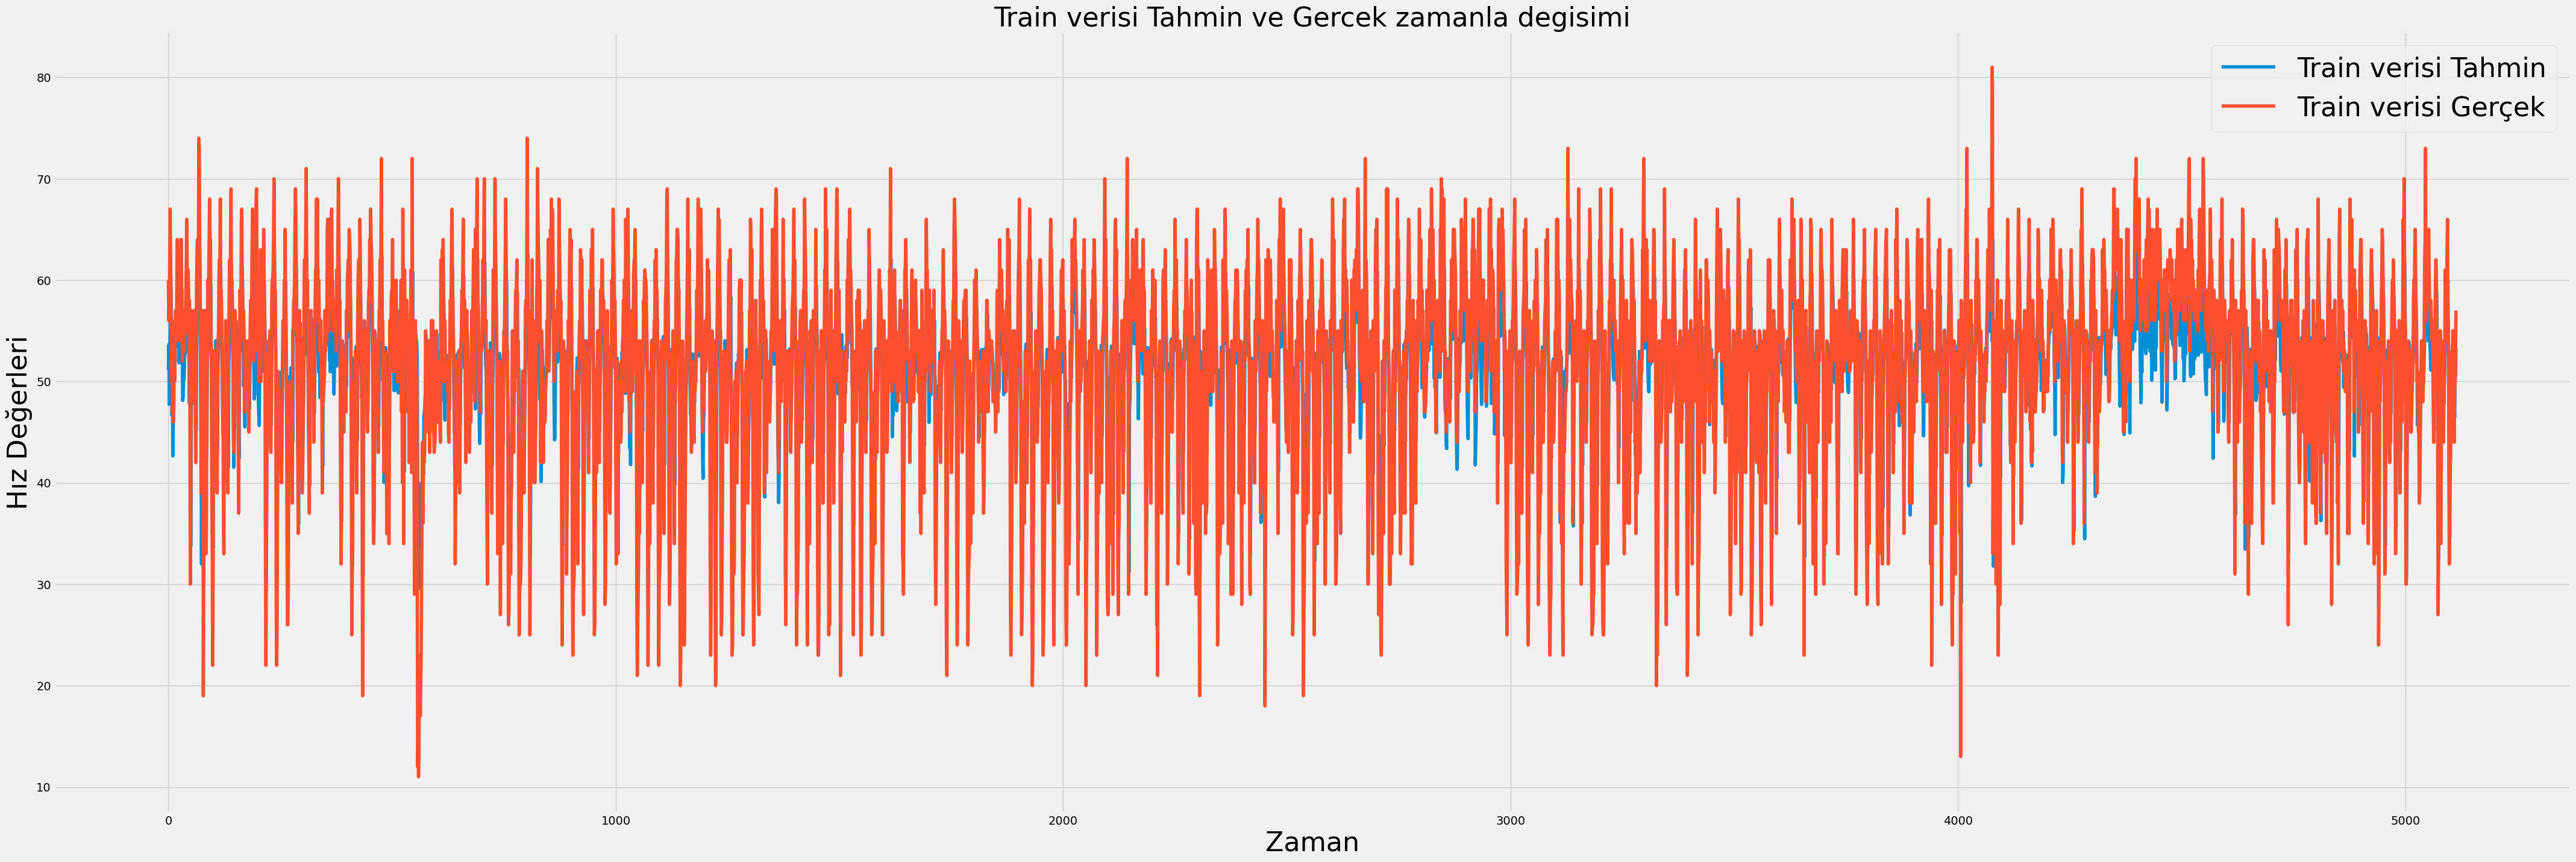

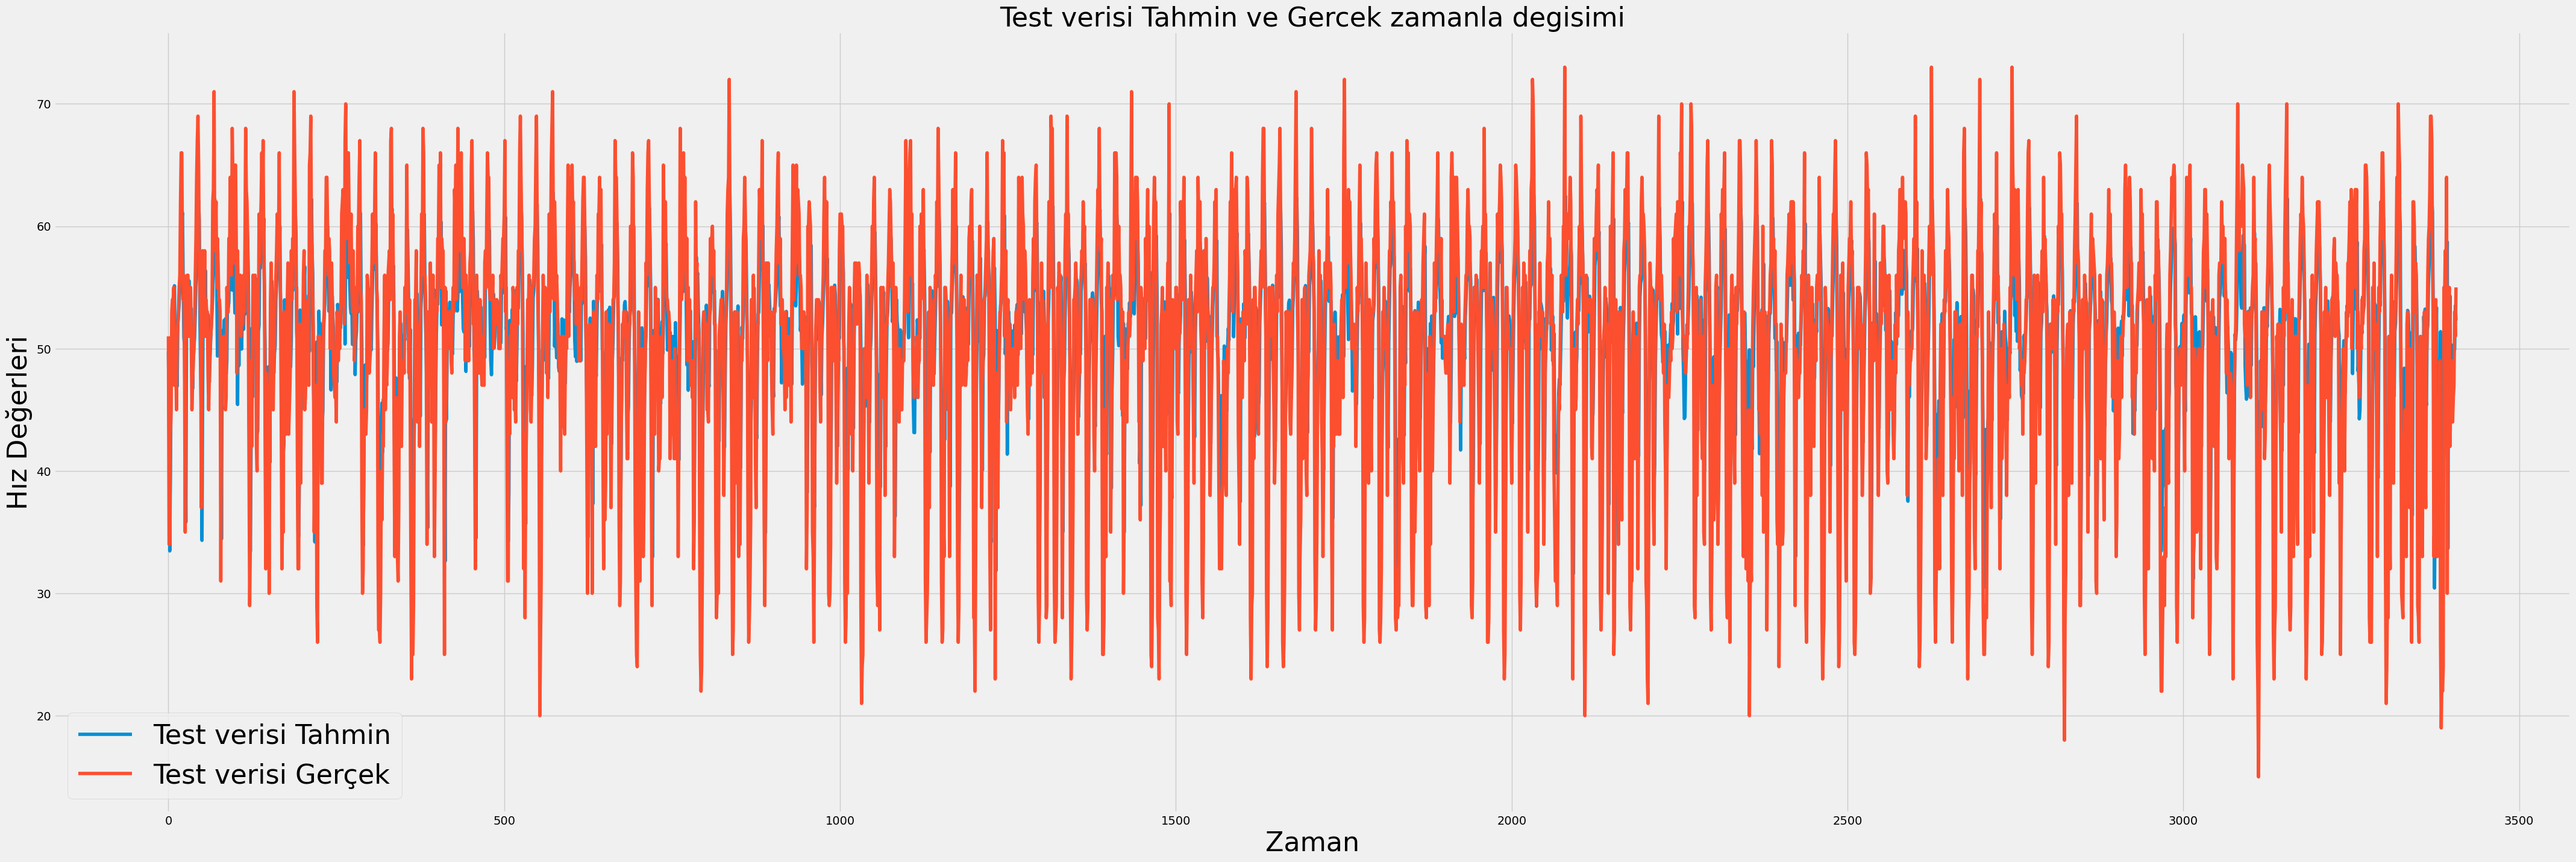

In [21]:
# 10. Test Veri Seti icin Ag sonucu ve verili cikislari cizdiriyoruz


plt.figure(figsize=(48, 16))
plt.plot(pred_train_Y, label = "Train verisi Tahmin")
plt.plot(train_Y, label = "Train verisi Gerçek")
plt.title('Train verisi Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')


plt.figure(figsize=(48, 16))
plt.plot(pred_test_Y, label = "Test verisi Tahmin")
plt.plot(test_Y, label = "Test verisi Gerçek")
plt.title('Test verisi Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')